In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

This code block uses the **pandas** library to read in a CSV file named "heart-disease.csv" and store it in a DataFrame object called df. The **.isna()** method is then used to check for missing values in the data and the **.sum()** method is used to count the number of missing values for each column. Finally, the **.shape**attribute is used to determine the number of rows and columns in the DataFrame.

The **df.isna().sum()** line of code is useful in checking the completeness of the data, as missing values can affect the performance of machine learning models. The **df.shape** line of code is useful in understanding the size of the data and ensuring that it has been read in correctly.

In [4]:
df=pd.read_csv("heart-disease.csv")
df.isna().sum()
df.shape

(303, 14)

This line of code is used to count the number of instances for each class in the "target" column of the **df** DataFrame. The **df["target"]** syntax is used to select the "target" column from the DataFrame, and the **.value_counts()** method is used to count the number of instances for each unique value in that column.

The result of this line of code will give us a sense of the balance (or imbalance) of the classes in the "target" column, which can be important for understanding the nature of the problem we are trying to solve and for determining appropriate evaluation metrics for our model.

In [27]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

This line of code builds on the previous line by plotting the count of instances for each class in the "target" column. The **.plot()** method is used to create the plot and the **kind** argument is set to "bar" to specify that a bar plot should be created.

This line of code provides a visual representation of the class distribution, which can be useful in understanding the balance (or imbalance) of the classes in the "target" column. In cases where the classes are imbalanced, it may be necessary to use specific techniques, such as oversampling or undersampling, to handle this imbalance and improve the performance of the model.

<AxesSubplot:>

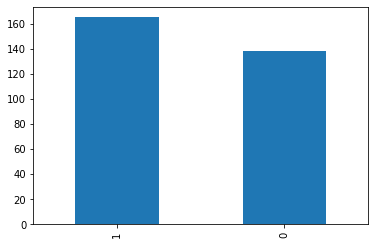

In [28]:
df["target"].value_counts().plot(kind="bar")

This line of code uses the **.info()** method to provide a summary of the information about the **df** DataFrame, including:

- The number of rows and columns in the DataFrame.
- The data types of each column.
- The number of non-null values in each column.
- The memory usage of the DataFrame.

This information is useful in understanding the structure of the data and ensuring that it has been read in correctly. For example, if the data type of a column is not what we expect, we may need to perform data type conversions to ensure that the data is correctly formatted for analysis and modeling. Additionally, the number of non-null values in each column can help identify any missing values that need to be addressed.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This line of code uses the **.describe()** method to generate summary statistics for the numerical columns in the **df** DataFrame. The summary statistics include:

- The count of the number of non-null values.
- The mean, or average, value of the column.
- The standard deviation of the values in the column.
- The minimum, 25th percentile (Q1), 50th percentile (median), 75th percentile (Q3), and maximum values of the column.

These summary statistics can provide a quick and easy way to get a sense of the central tendency, spread, and range of the numerical data in the DataFrame. Understanding these statistics can be useful in detecting any outliers or anomalies in the data, as well as in selecting appropriate feature scaling methods for our data.

In [33]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [38]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


This code block uses the **pandas** library's **crosstab** method to create a cross-tabulation of the "target" and "sex" columns in the df DataFrame. A cross-tabulation is a type of table used to summarize the relationship between two categorical variables. The resulting table gives the count of instances where the "target" value is 0 or 1, and the "sex" value is either "Male" or "Female".

The resulting table is then plotted as a bar plot using the .plot() method, with the kind argument set to "bar". The **plt.title()**, **plt.xlabel()**, and **plt.ylabel()** functions are used to add a title, x-axis label, and y-axis label to the plot, respectively. The **plt.legend()** function is used to specify the legend for the plot, with "Male" and "Female" being the two categories. The plt.xticks(rotation=0) line is used to rotate the x-axis tick labels to make them easier to read.

This plot can help to identify any significant differences in the frequency of heart disease between males and females, and can provide insights into any potential relationships between the target variable and the "sex" variable.

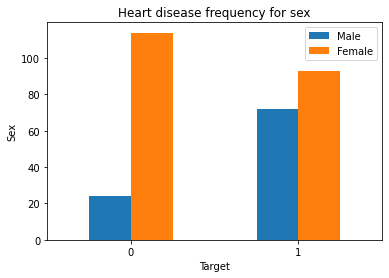

In [47]:
pd.crosstab(df.target, df.sex).plot(kind="bar")
plt.title("Heart disease frequency for sex")
plt.xlabel("Target")
plt.ylabel("Sex")
plt.legend(["Male", "Female"])
plt.xticks(rotation=0);

**Age vs Max HeartRate for Heart disease**

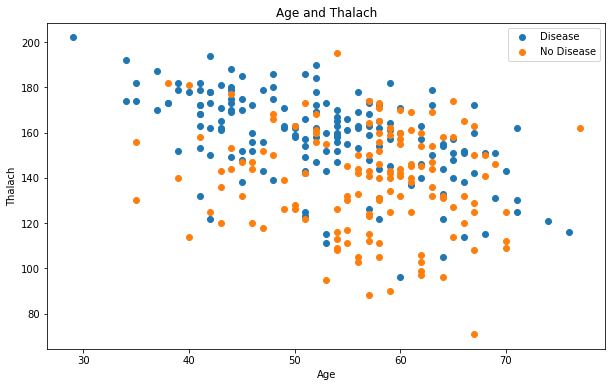

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1]);
# df.age[df.target==1] -----> give us age where target == 1

plt.scatter(df.age[df.target==0], df.thalach[df.target==0]);

plt.title("Age and Thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No Disease"]);

This code block plots a histogram of the "age" column in the **df** DataFrame. A histogram is a graphical representation of the distribution of a set of numerical data.

The **.plot.hist()** method is used to create the histogram, which shows the distribution of the ages in the "age" column. The semicolon at the end of the line is used to suppress the display of the resulting plot's object type and memory address, which can be useful in a Jupyter Notebook where multiple plots are being generated in the same cell.

This histogram can provide information about the distribution of ages in the data, including the central tendency, spread, and shape of the distribution. This information can be useful in understanding the relationship between the target variable and the "age" variable, as well as in selecting appropriate feature scaling methods for our data.

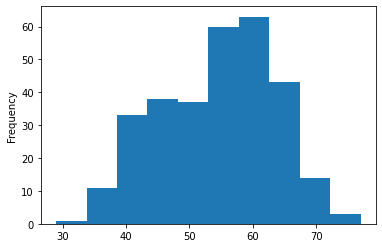

In [60]:
df.age.plot.hist();

In [61]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


This code block uses the **pandas** library's **crosstab** method to create a cross-tabulation of the "cp" (chest pain) and "target" columns in the **df** DataFrame. A cross-tabulation is a type of table used to summarize the relationship between two categorical variables. The resulting table gives the count of instances where the "target" value is 0 or 1, and the "cp" value is one of four categories (0, 1, 2, or 3).

The resulting table is then plotted as a bar plot using the **.plot() **method, with the kind argument set to "bar". The **plt.title(), plt.xlabel**(), and **plt.ylabel()** functions are used to add a title, x-axis label, and y-axis label to the plot, respectively. The plt.legend() function is used to specify the legend for the plot, with "No Disease" and "Disease" being the two categories.

This plot can help to identify any significant relationships between the frequency of chest pain and the presence or absence of heart disease, and can provide insights into the relationship between the target variable and the "cp" variable.

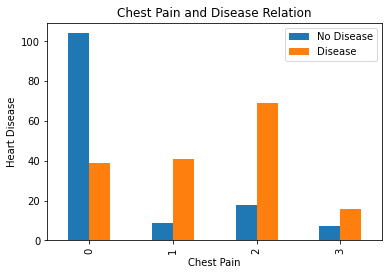

In [68]:
pd.crosstab(df.cp, df.target).plot(kind="bar")
plt.title("Chest Pain and Disease Relation")
plt.xlabel("Chest Pain")
plt.ylabel("Heart Disease")
plt.legend(["No Disease", "Disease"]);

This code block calculates the pairwise Pearson correlation coefficient between all columns in the df DataFrame using the **.corr()** method. The Pearson correlation coefficient measures the linear relationship between two continuous variables. The value of the coefficient ranges from -1 to 1, with -1 indicating a strong negative correlation, 0 indicating no correlation, and 1 indicating a strong positive correlation.

The output of the **.corr()** method is a correlation matrix, which is a table showing the correlation between each pair of variables in the DataFrame. This correlation matrix can provide information about the strength and direction of the relationships between the variables in the data, which can be useful in identifying relevant features for building a machine learning model.

Note that this correlation matrix only considers linear relationships, and other types of relationships (e.g., nonlinear, categorical) may not be reflected in the correlation coefficients.

In [71]:
# correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


This code block creates a heatmap of the correlation matrix calculated in the previous cell. The **sns.heatmap()** function from the seaborn library is used to create the heatmap.

The **annot** argument is set to **True** to display the values of the correlation coefficients in each cell of the heatmap, and the **linewidths** argument is set to **0.5** to control the width of the lines separating the cells. The fmt argument is set to "**.2f**" to specify the format of the displayed values, with "**.2f**" meaning to display the values with two decimal places.

The resulting heatmap provides a graphical representation of the relationships between the variables in the data, making it easier to quickly identify which variables are positively or negatively correlated, and to what extent. The darker the color, the stronger the correlation. This information can be used to identify features that are likely to be important in predicting the target variable, and can also be useful in identifying multicollinearity between features.

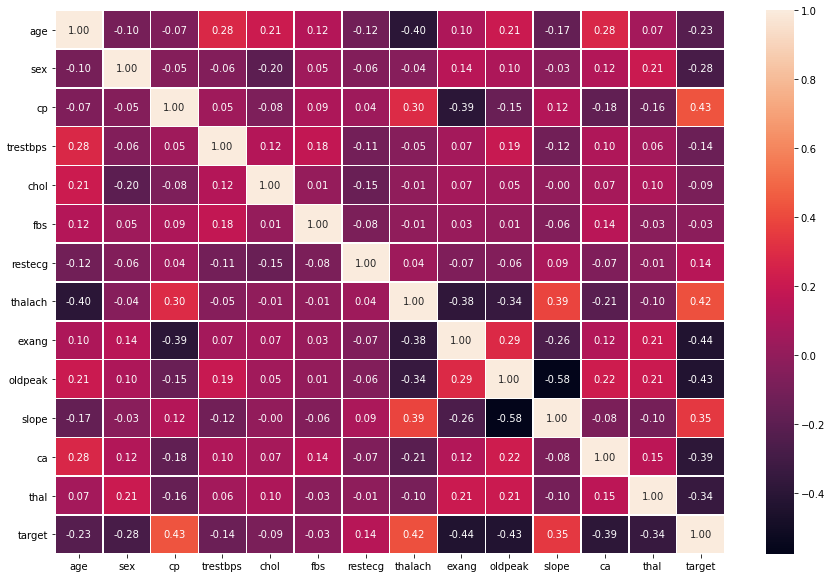

In [80]:
cor_metricx=df.corr() # corr --> corelation
fig, axis=plt.subplots(figsize=(15,10))
axis=sns.heatmap(cor_metricx, annot=True, linewidths=0.5, fmt=".2f") # annot-->numbers inside boxs

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This code block creates two separate arrays, one for the features (**x**) and one for the target (y) of the data.

The **df.drop()** method is used to remove the "target" column from the df DataFrame and create a new DataFrame x containing all the other columns, which will be used as the features in the machine learning model. The axis argument is set to 1 to indicate that the "target" column should be dropped along the columns axis.

The target array y is created by indexing the "target" column from the original df DataFrame.

These two arrays will be used as input for the machine learning models in the following cells.

In [6]:
x=df.drop("target", axis=1)
y=df["target"]

**`split data`**

This code block splits the feature and target arrays into training and testing datasets.

The **np.random.seed(2)** line sets the random seed to 2, which ensures that the same random numbers will be generated each time the code is run, ensuring that the same split between training and testing data is made each time.

The **train_test_split** function from the sklearn.model_selection module is then used to split the x and y arrays into training and testing datasets. The test_size argument is set to 0.2, which means that 20% of the data will be used for testing and 80% of the data will be used for training.

The resulting training datasets **x_train** and **y_train** will be used to train the machine learning models, and the testing datasets **x_test** and **y_test** will be used to evaluate the performance of the trained models. This is a common practice in machine learning, as it ensures that the model is tested on a completely independent dataset from the one it was trained on, giving a better representation of its performance on new, unseen data.

In [7]:
np.random.seed(2)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

* logistic regression
* K-Nearest Neightbour Classifier
* Random Forest Classifier

This code block defines a function named **fit_score** which will fit and evaluate the performance of three different machine learning models: logistic regression, K-nearest neighbors (KNN), and random forest.

The **models** dictionary at the beginning of the code block associates the names of the models ("Logistic Regression", "KNN", and "Random Forest") with the corresponding machine learning model classes from scikit-learn (**LogisticRegression, KNeighborsClassifier,** and **RandomForestClassifier**).

The **fit_score** function takes four arguments: models, x_train, x_test, y_train, and y_test. The models argument is the dictionary of model names and their corresponding model classes, x_train and y_train are the training feature and target arrays, and x_test and y_test are the testing feature and target arrays.

The function starts by setting the random seed to 2 using np.random.seed(2), which ensures that the same random numbers will be generated each time the code is run.

A dictionary named model_score is then initialized, which will store the accuracy scores of the trained models.

A for loop then iterates over the models dictionary, fitting each model using the fit method and then evaluating its accuracy using the score method on the testing datasets. The accuracy scores are then stored in the model_score dictionary, with the model names as the keys and the accuracy scores as the values.

Finally, the model_score dictionary is returned by the function

In [30]:
models={"Logistic Regression" : LogisticRegression(), 
      "KNN" : KNeighborsClassifier(),
      "Random Forest" : RandomForestClassifier()}

def fit_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(2)
    model_score={}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name]=model.score(x_test, y_test)
    return model_score

The output of the **fit_score** function is a dictionary containing the accuracy score of each of the three machine learning models (Logistic Regression, KNN, and Random Forest) on the test data. The accuracy score represents the percentage of correct predictions made by the model on the test data.

In [33]:
scores = fit_score(models, x_train, x_test, y_train, y_test)
scores

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9016393442622951,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.9016393442622951}

The code below creates a bar plot comparing the accuracy of the three machine learning models. The accuracy is represented on the y-axis, and the three models are compared on the x-axis. The code generates a bar plot of the accuracy of each of the three models, and it allows us to compare the accuracy of each model at a glance.

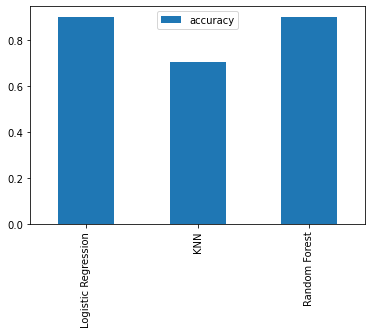

In [44]:
model_comperision = pd.DataFrame(scores, index=["accuracy"])
model_comperision.T.plot(kind="bar"); 

### Hyperparameter tuning

The code below trains a k-nearest neighbors (KNN) model with different values of k (number of neighbors) ranging from 1 to 20. It uses a for loop to fit the KNN model on the training data for each value of k, and it appends the accuracy score for the training data and test data for each iteration of the loop to two separate lists, **training_score** and **test_score**. These lists will contain the accuracy scores for each value of k, and they will be used later to visualize the relationship between the number of neighbors and the accuracy of the model.

In [55]:
training_score=[]
test_score=[]
knn=KNeighborsClassifier()

for i in range(1,21):
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    training_score.append(knn.score(x_train, y_train))
    test_score.append(knn.score(x_test, y_test))

In [58]:
training_score

[1.0,
 0.7892561983471075,
 0.7396694214876033,
 0.7355371900826446,
 0.7396694214876033,
 0.7396694214876033,
 0.7231404958677686,
 0.7107438016528925,
 0.7066115702479339,
 0.6900826446280992,
 0.7107438016528925,
 0.6983471074380165,
 0.7066115702479339,
 0.7024793388429752,
 0.6859504132231405,
 0.6735537190082644,
 0.6900826446280992,
 0.6735537190082644,
 0.6818181818181818,
 0.6735537190082644]

In [59]:
test_score

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885]

The code plots the accuracy scores of a KNN model with varying number of neighbors on the training and testing datasets. The highest accuracy score on the test data occurs when the number of neighbors is equal to 12.

0.7704918032786885


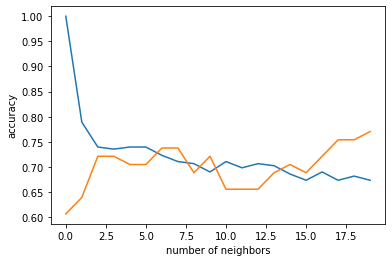

In [66]:
plt.plot(training_score)
plt.plot(test_score)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")

print(max(test_score))

### Hyperparameter tuning by RandomizedSearchCV

The **log_reg_grid** dictionary is a hyperparameter grid for a Logistic Regression model. It contains two hyperparameters: C and solver.
C is the inverse of regularization strength and takes values in the log space between -4 and 4 with 20 equally spaced values. The solver hyperparameter is set to liblinear.

The **rf_grid** dictionary is a hyperparameter grid for a Random Forest Classifier model. It contains four hyperparameters: 

**n_estimators**, max_depth, **min_samples_split**, and **min_samples_leaf**.

**n_estimators** is the number of trees in the forest and takes values in the range from 10 to 1000 with an increment of 50.
max_depth represents the maximum depth of the tree and can take values of None, 3, 5, or 10.

**min_samples_split** is the minimum number of samples required to split an internal node and takes values in the range from 2 to 20 with an increment of 2.

**min_samples_leaf** is the minimum number of samples required to be at a leaf node and takes values in the range from 1 to 20 with an increment of 2.

In [45]:
# Logistic Regression
log_reg_grid={"C" : np.logspace(-4,4,20),  
             "solver" : ["liblinear"]}

# RandomForestClassifier
rf_grid={"n_estimators" : np.arange(10,1000,50),
        "max_depth":(None, 3,5,10),
       "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

This code is creating a RandomizedSearchCV object for logistic regression and fitting it to the training data (x_train, y_train). The object uses a set of hyperparameters specified in the log_reg_grid dictionary. The hyperparameters will be sampled randomly 20 times during the cross-validation and the best hyperparameters will be selected based on the cross-validation results. The "verbose" argument is set to True, which means that the search process will be verbose, meaning it will display detailed messages about the search process and results.

In [29]:
# testing Logistic Regression

np.random.seed(2)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20, # 20 different combinations
                             verbose=True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

The **code rs_log_reg.best_params_** returns the best hyperparameters found by the randomized search. In the previous code cell, we initialized the randomized search with the **RandomizedSearchCV** class and passed in our logistic regression model, the grid of hyperparameters (**log_reg_grid**), and the number of folds for cross-validation (cv) and number of iterations (**n_iter**) to try. By calling rs_log_reg.fit(x_train, y_train), we fit the randomized search on the training data and search for the best hyperparameters that optimize the model's performance.

The **rs_log_reg.best_params_ **returns the set of hyperparameters that resulted in the highest accuracy during the search. These hyperparameters can then be used to train a final model and make predictions on unseen data.

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(x_test, y_test)

0.9180327868852459

This code creates a **RandomizedSearchCV** object for a RandomForestClassifier model. The **RandomizedSearchCV** performs a randomized search of the hyperparameters defined in the rf_grid dictionary. The **RandomizedSearchCV** uses 5-fold cross-validation and 20 iterations, and it outputs verbose output. The **np.random.seed(2)** line is setting the random seed to ensure the results of the randomized search are reproducible. Finally, the **rs_rf** object is fit to the training data **x_train** and **y_train**.

In [46]:
np.random.seed(2)

rs_rf=RandomizedSearchCV(RandomForestClassifier(), 
                       param_distributions=rf_grid, 
                       cv=5, 
                       n_iter=20, 
                       verbose=True)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': (None, 3, 5, 10),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [47]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_depth': None}

In [48]:
rs_rf.score(x_test, y_test)

0.8852459016393442

### Hyperparameter tuning by GridSearchCV

This code is performing a Grid Search Cross Validation (CV) on a logistic regression model. The purpose of Grid Search CV is to tune the hyperparameters of a model in order to obtain the best performance on a given dataset.

In this code, the hyperparameters of the logistic regression model are being tuned through the use of a dictionary called "log_reg_grid". The "C" parameter is the inverse of regularization strength in the logistic regression model, and it is being searched in a logarithmic range between 10^-4 to 10^4 with 30 different values. The "solver" parameter is set to "liblinear" and it specifies the algorithm to be used for optimization.

The GridSearchCV object is created by passing the logistic regression model, the hyperparameters dictionary, the number of folds for cross-validation (5), and setting verbose to True (which will give information about the progress of the grid search). Finally, the fit method is called on the GridSearchCV object with the training data to perform the grid search and tune the hyperparameters.

In [9]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver": ["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [10]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [11]:
gs_log_reg.score(x_test, y_test)

0.9180327868852459

In [13]:
y_preds=gs_log_reg.predict(x_test)

In [14]:
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [16]:
np.array(y_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

This code is plotting the Receiver Operating Characteristic (ROC) curve of the logistic regression model that was optimized with GridSearchCV. The ROC curve is a graph of the true positive rate (sensitivity) against the false positive rate (1 minus specificity) for different classification thresholds. The area under the ROC curve is used as a measure of the quality of the classifier. In this case, the function "plot_roc_curve" is used to plot the ROC curve for the given logistic regression model using the x_test and y_test data.

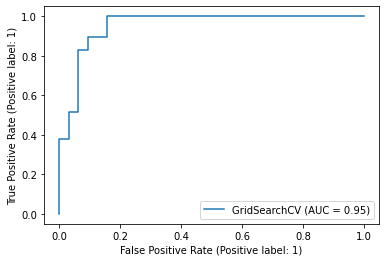

In [18]:
plot_roc_curve(gs_log_reg, x_test, y_test);

In [22]:
print(confusion_matrix(y_test, y_preds))

[[27  5]
 [ 0 29]]


The function **plot_conf_map** takes two arguments, **y_test** and **y_preds**, which are the true labels of the test set and the predicted labels from a model, respectively. It creates a plot of a confusion matrix using the **confusion_matrix** function from scikit-learn and the **heatmap** function from the seaborn library. The confusion matrix displays the number of true positives, true negatives, false positives, and false negatives for the model's predictions. The **annot** argument is set to True to show the values in each cell of the matrix. The x-axis and y-axis labels are set to "True label" and "Predict label", respectively.

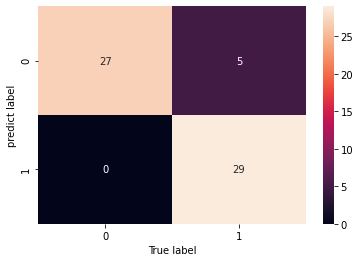

In [33]:
def plot_conf_map(y_test, y_preds):
    fig, axs=plt.subplots()
    axs=sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
    plt.xlabel("True label")
    plt.ylabel("predict label")
    
plot_conf_map(y_test, y_preds)

This code block is printing the classification report for the test data set with the predicted values from the machine learning model. The classification report includes the following metrics:

- **Precision**: It is the ratio of true positive predictions to the sum of true positive and false positive predictions. It is a measure of the accuracy of the positive predictions.

- **Recall**: It is the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the ability of the model to find all the positive instances.

- **F1-score**: It is the harmonic mean of precision and recall, and it is a measure of the balance between precision and recall.

- **Support**: It is the number of samples of the corresponding class.

These metrics are calculated for each class in the target variable and are presented in a table format, making it easier to compare the performance of the model for each class.

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



In [36]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

This line of code is creating an instance of the Logistic Regression classifier.

**clf** is a variable that is being assigned the Logistic Regression model.

The **LogisticRegression** class has several arguments, two of which are being passed to this instance of the model:

- **C**: This is the inverse of regularization strength; a smaller value specifies stronger regularization. In this case, the value of C is set to 0.1082636733874054.

- **solver**: This is the algorithm to use in the optimization problem. In this case, the value of solver is set to 'liblinear', which means the Logistic Regression model will use the LIBLINEAR library for optimization.

Note that the specific values being passed to C and solver in this code may not be optimal for our problem, and it's important to carefully choose these hyperparameters based on the problem and data we are working with.

In [38]:
clf=LogisticRegression(C=0.1082636733874054, solver='liblinear')
clf

LogisticRegression(C=0.1082636733874054, solver='liblinear')

This code is using the **cross_val_score** function from the **sklearn.model_selection** module to evaluate the performance of the Logistic Regression classifier **clf**.

The **cross_val_score** function performs k-fold cross-validation, where k is the value of the cv argument (in this case, 5). In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is used as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. This process is repeated k times, with each of the k subsamples used exactly once as the validation data. The **cross_val_score** function returns an array of k validation scores.

The arguments passed to the **cross_val_score** function are as follows:

clf: This is the Logistic Regression classifier that we created earlier.

x: This is the input feature data for the model.

y: This is the target variable.

cv: This specifies the number of folds to use in k-fold cross-validation (in this case, 5).

scoring: This argument specifies the scoring metric to use. In this case, the scoring metric is set to "accuracy", which means the accuracy score will be used to evaluate the model's performance.

The last line cv_acc is just printing the result of the **cross_val_score** function.

In [40]:
cv_acc=cross_val_score(clf,x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

The line **cv_acc=np.mean(cv_acc)** takes the mean of the array of cross-validation scores (**cv_acc**) obtained from the previous code using the np.mean function from the NumPy library.

The np.mean function calculates the average of an array-like object and returns a single value that represents the mean.

After this line is executed, the **cv_acc** variable will now contain a single scalar value which is the mean of the cross-validation accuracy scores, instead of an array of scores. This mean value can be used as a single metric to evaluate the performance of the Logistic Regression classifier on the given data.

In [42]:
cv_acc=np.mean(cv_acc)
cv_acc

0.834808743169399

The below code perform similar operations as the previous code, but this time we are computing the mean of the cross-validation precision scores.

The first line **cv_pre=cross_val_score(clf,x, y, cv=5, scoring="precision")** uses the cross_val_score function with the same arguments as before, except that this time the scoring metric is set to "precision". This means that the precision score will be used to evaluate the performance of the Logistic Regression classifier.

The second line **cv_pre=np.mean(cv_pre)** calculates the mean of the cross-validation precision scores obtained from the first line, just like before. After this line is executed, the **cv_pre** variable will contain the mean precision score.

So in summary, these two lines of code compute the mean precision score from 5-fold cross-validation of the Logistic Regression classifier.

In [44]:
cv_pre=cross_val_score(clf,x, y, cv=5, scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8182683982683983

The below code perform similar operations as the previous code, but this time they are computing the mean of the cross-validation recall scores.

- The first line **cv_rec=cross_val_score(clf,x, y, cv=5, scoring="recall")** uses the **cross_val_score** function with the same arguments as before, except that this time the scoring metric is set to "recall". This means that the recall score will be used to evaluate the performance of the Logistic Regression classifier.

- The second line **cv_rec=np.mean(cv_rec)** calculates the mean of the cross-validation recall scores obtained from the first line, just like before. After this line is executed, the cv_rec variable will contain the mean recall score.

In [46]:
cv_rec=cross_val_score(clf,x, y, cv=5, scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9030303030303031

The below code perform similar operations as the previous code, but this time they are computing the mean of the cross-validation F1 scores.

The first line **cv_f1=cross_val_score(clf,x, y, cv=5, scoring="f1")** uses the **cross_val_score** function with the same arguments as before, except that this time the scoring metric is set to "f1". This means that the F1 score will be used to evaluate the performance of the Logistic Regression classifier.

The second line **cv_f1=np.mean(cv_f1)** calculates the mean of the cross-validation F1 scores obtained from the first line, just like before. After this line is executed, the **cv_f1** variable will contain the mean F1 score.

In [48]:
cv_f1=cross_val_score(clf,x, y, cv=5, scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8572876223964057

**Visualization**

The code below creates a pandas dataframe that stores the mean accuracy, precision, recall, and F1 scores obtained from 5-fold cross-validation of the Logistic Regression classifier, and then plots the values in a bar graph.

- The first line creates a dataframe **cv_metric** with columns "Accuracy", "Precision", "Recall", and "F1", and a single row with index 0. The values in each column are the mean cross-validation scores stored in the variables **cv_acc**, **cv_pre**, **cv_rec**, and **cv_f1**, respectively.

- The second line creates a bar graph using the plot method of the dataframe **cv_metric**, transposed using .T. The kind argument is set to "bar" to indicate that a bar graph should be generated, and the legend argument is set to False to turn off the **legend**. The semicolon at the end suppresses the output of the plot, allowing only the plot to be displayed.

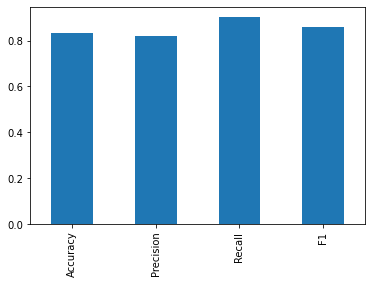

In [62]:
cv_metric = pd.DataFrame({"Accuracy" : cv_acc,
             "Precision" : cv_pre,
             "Recall" : cv_rec,
             "F1" : cv_f1},
            index=[0])

cv_metric.T.plot(kind="bar", legend=False);

**Features Importance**

The code below trains a Logistic Regression classifier on the training data and then retrieves the coefficients of the trained model.

- The first line **clf=LogisticRegression(C=0.1082636733874054, solver='liblinear')** creates a Logistic Regression classifier object with the hyperparameter C set to 0.1082636733874054 and the solver set to "liblinear".

- The second line **clf.fit(x_train, y_train)** trains the Logistic Regression classifier on the training data **x_train** and corresponding labels **y_train**.

- The third line **clf.coef_** retrieves the coefficients of the trained Logistic Regression model. The coef_ attribute of the classifier object stores the coefficients of the features in the model.

In [63]:
clf=LogisticRegression(C=0.1082636733874054, solver='liblinear')
clf.fit(x_train, y_train)

clf.coef_

array([[ 0.00647008, -0.68304127,  0.6184325 , -0.01307299, -0.00299729,
        -0.01771121,  0.24452429,  0.0243036 , -0.38642002, -0.39287514,
         0.32969957, -0.51228764, -0.48958063]])

he code The below code creates a dictionary that maps the feature names in the data df to their corresponding coefficients in the Logistic Regression model.

- The **zip** function is used to combine the column names of the dataframe df and the coefficients of the trained Logistic Regression model, which are stored in **clf.coef_[0]**. The **zip** function takes two or more iterables as input and returns an iterator of tuples, where the i-th tuple contains the i-th element from each iterable.

- The dict function is used to create a dictionary from the list of tuples returned by **zip**. The resulting dictionary feature_dict maps the feature names in df to their corresponding coefficients in the Logistic Regression model.

In [64]:
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.006470082865358063,
 'sex': -0.6830412718637527,
 'cp': 0.6184325005884739,
 'trestbps': -0.01307298669282449,
 'chol': -0.0029972895509600053,
 'fbs': -0.01771120825427197,
 'restecg': 0.24452428704317164,
 'thalach': 0.024303596828602662,
 'exang': -0.38642001993211905,
 'oldpeak': -0.39287514194720935,
 'slope': 0.3296995660327986,
 'ca': -0.5122876362201381,
 'thal': -0.4895806289809405}

The code below creates a bar plot to visualize the coefficients of the Logistic Regression model for each feature.

The first line **feature_df = pd.DataFrame(feature_dict, index=[0])** creates a pandas dataframe feature_df from the dictionary **feature_dict**. The dataframe has a single row with the feature names as columns and their corresponding coefficients as values.

The second line **feature_df.T.plot(kind="bar", legend=False)** creates a bar plot of the transposed dataframe feature_df.T. The T method returns the transposed version of the dataframe, with rows and columns switched. The bar plot shows the coefficients of the Logistic Regression model for each feature. The kind argument is set to "bar" to specify the type of plot to be created and **legend** is set to **False** to disable the display of the legend.

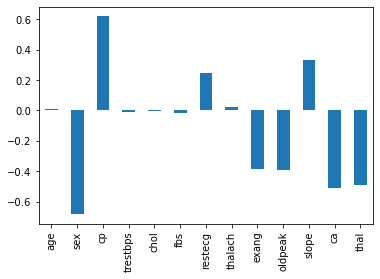

In [68]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind="bar", legend=False);

The code below calculates a cross-tabulation (also known as a contingency table or pivot table) between the columns "sex" and "target" in the dataframe **df**.

In [71]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93
